<a href="https://colab.research.google.com/github/flashhhhh/MNIST-using-CNN/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras.utils as np_utils
from keras.datasets import mnist
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Download MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# Format data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

num_classes = 10
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
# Build CNN
i = Input(X_train[0].shape)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)

x = Dropout(0.2)(x)
x = Dense(num_classes, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0     

In [9]:
# Set up train data
train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, height_shift_range=0.08, zoom_range=0.08, shear_range=0.3)
test_gen = ImageDataGenerator()

train_generator = train_gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [10]:
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 286s 602ms/step - loss: 0.1323 - accuracy: 0.9598 - val_loss: 0.2664 - val_accuracy: 0.9138
Epoch 2/5
468/468 [==============================] - 279s 596ms/step - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.0640 - val_accuracy: 0.9792
Epoch 3/5
468/468 [==============================] - 267s 571ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 4/5
468/468 [==============================] - 266s 568ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0367 - val_accuracy: 0.9889
Epoch 5/5
468/468 [==============================] - 273s 584ms/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 0.0271 - val_accuracy: 0.9911


In [12]:
score = model.evaluate(X_test, Y_test)
print(score[0])
print(score[1])

313/313 [==============================] - 11s 34ms/step - loss: 0.0272 - accuracy: 0.9910
0.02719702385365963
0.9909999966621399


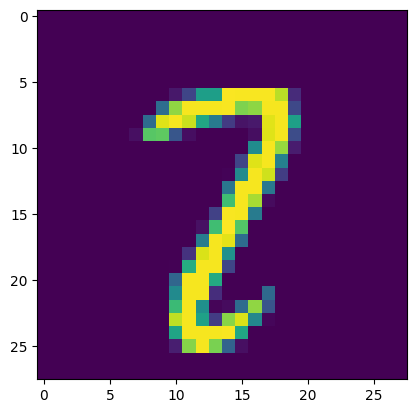

Predict: 7
Original: 2


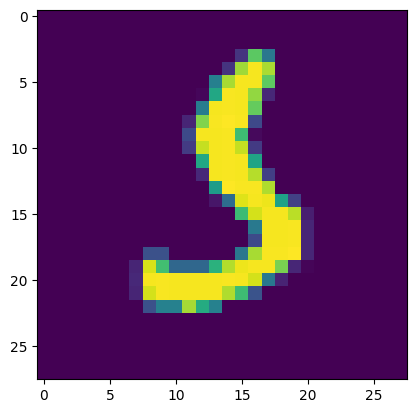

Predict: 3
Original: 5


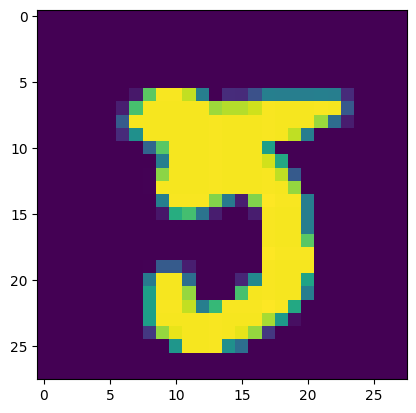

Predict: 3
Original: 5


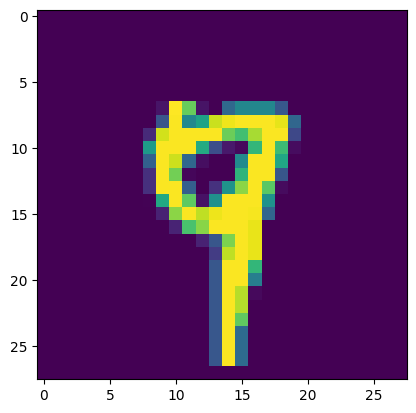

Predict: 7
Original: 9


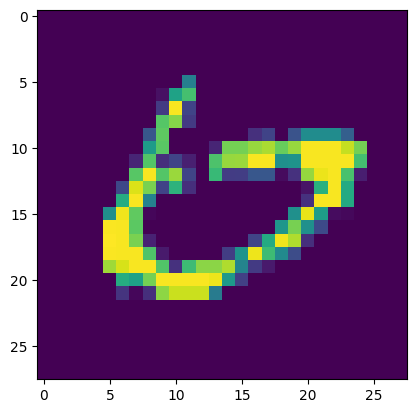

Predict: 0
Original: 6


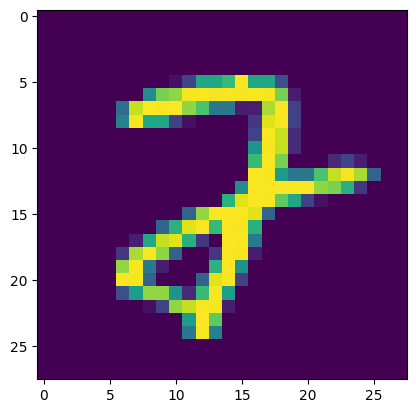

Predict: 7
Original: 2


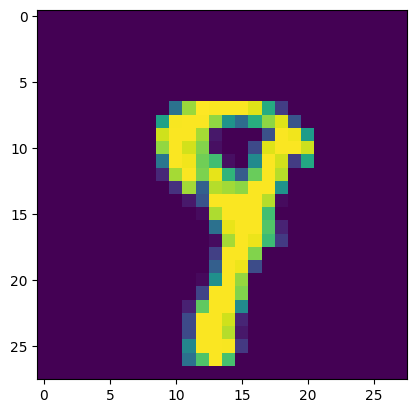

Predict: 7
Original: 9


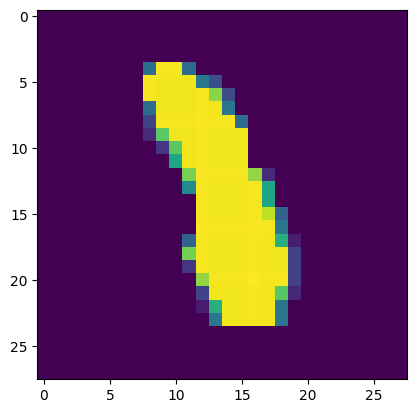

Predict: 8
Original: 1


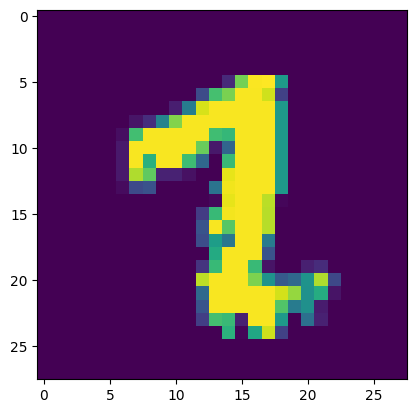

Predict: 7
Original: 2


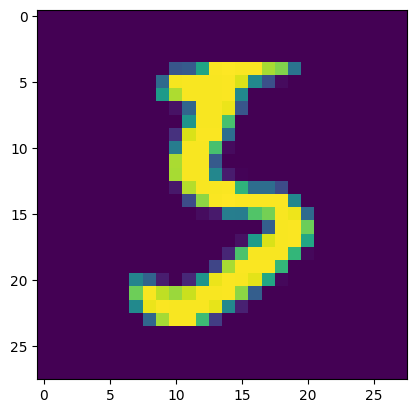

Predict: 3
Original: 5


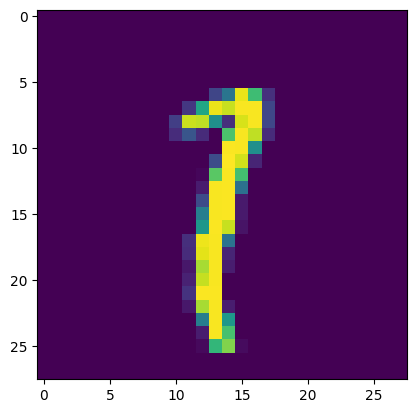

Predict: 7
Original: 1


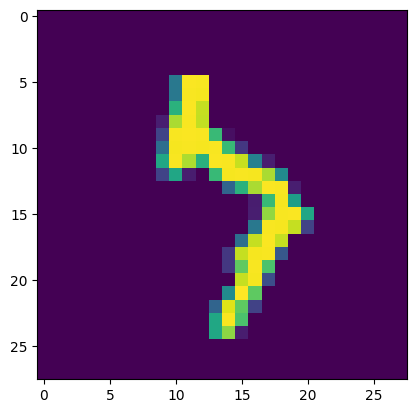

Predict: 3
Original: 7


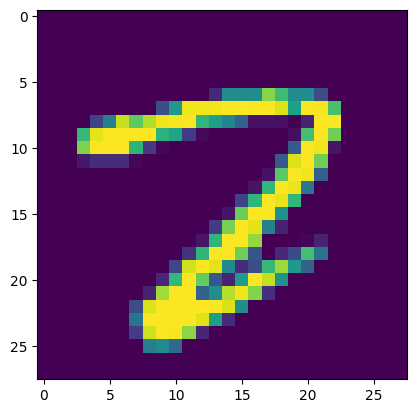

Predict: 7
Original: 2


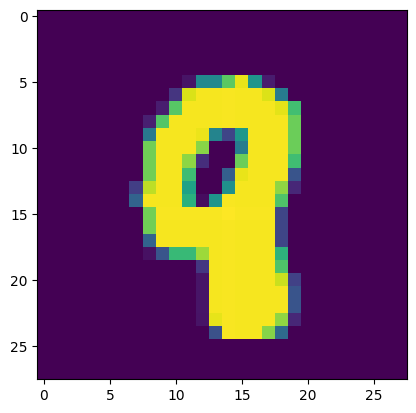

Predict: 9
Original: 8


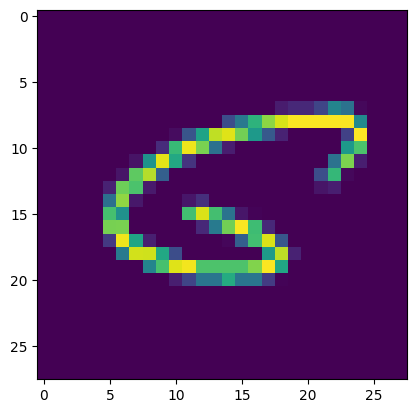

Predict: 5
Original: 6


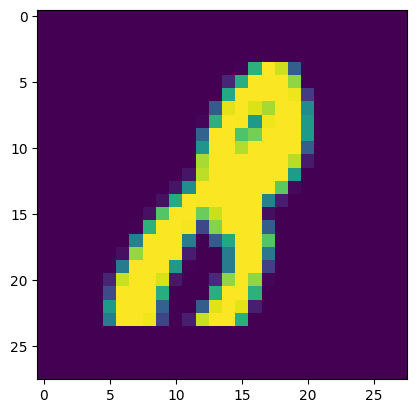

Predict: 9
Original: 8


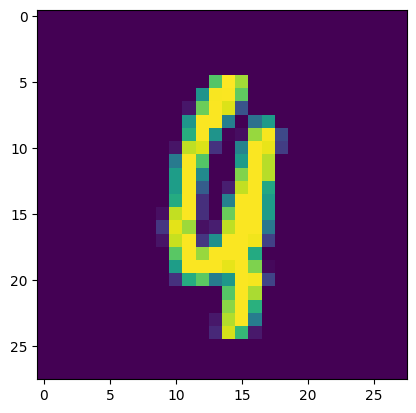

Predict: 4
Original: 9


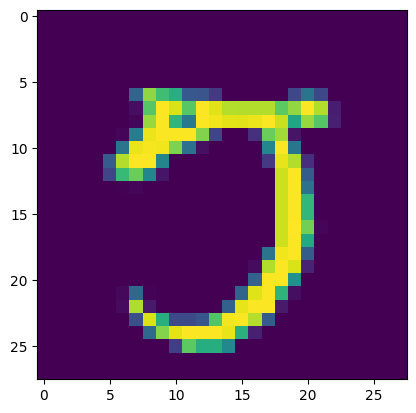

Predict: 7
Original: 5


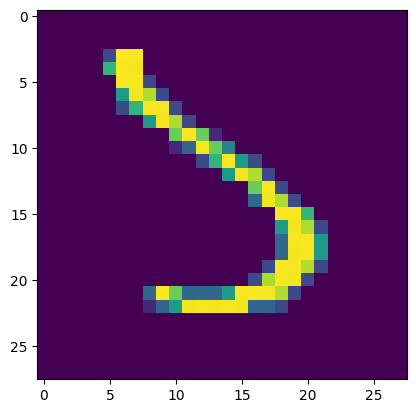

Predict: 3
Original: 5


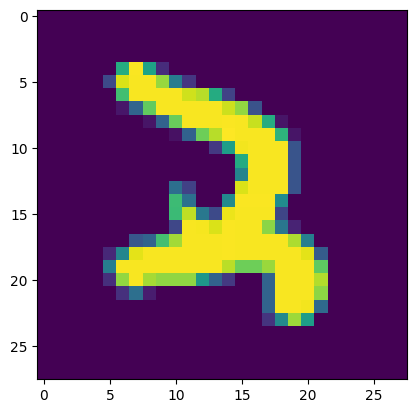

Predict: 3
Original: 2


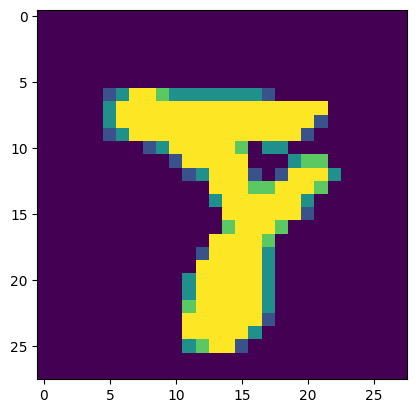

Predict: 7
Original: 8


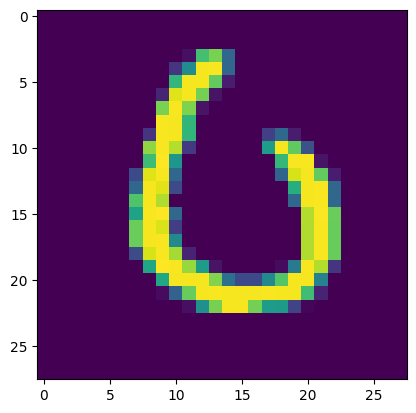

Predict: 6
Original: 0


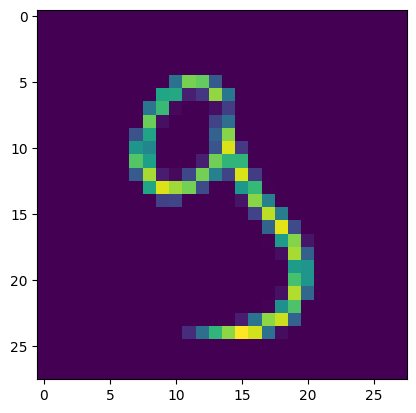

Predict: 3
Original: 9


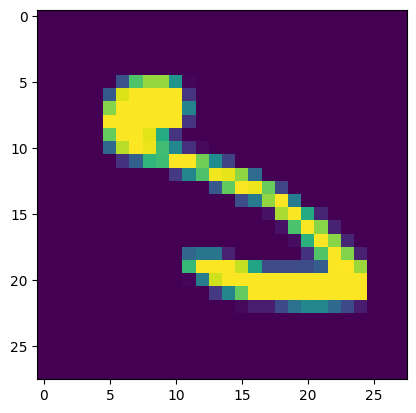

Predict: 3
Original: 5


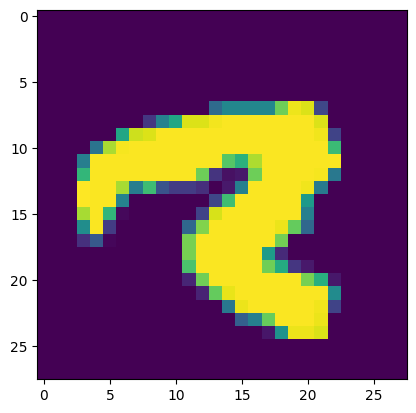

Predict: 7
Original: 2


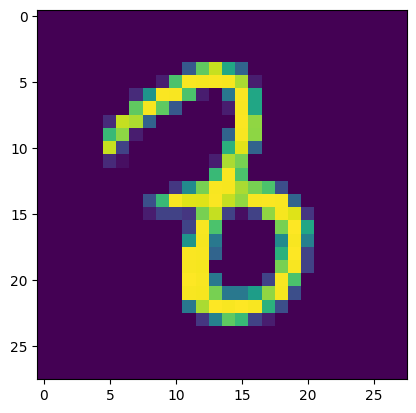

Predict: 3
Original: 8


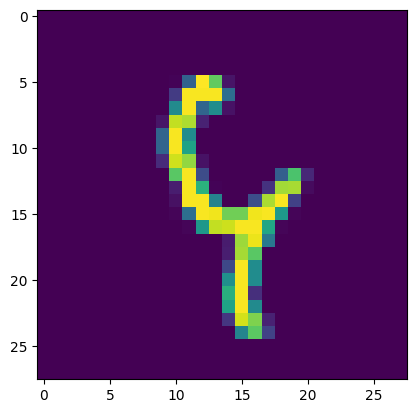

Predict: 4
Original: 9


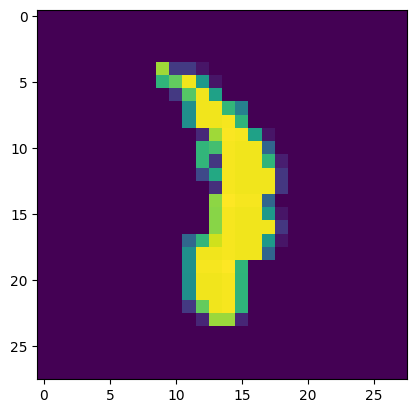

Predict: 7
Original: 1


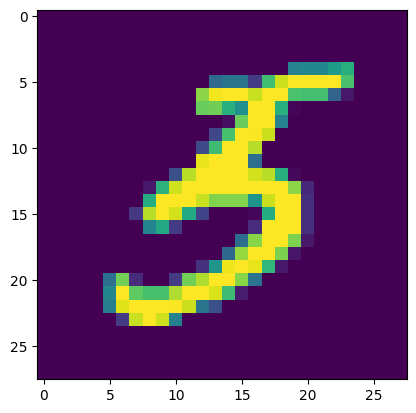

Predict: 3
Original: 5


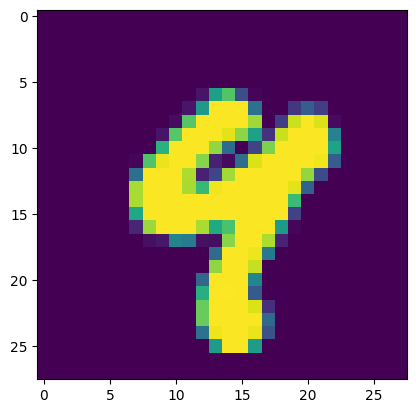

Predict: 9
Original: 4


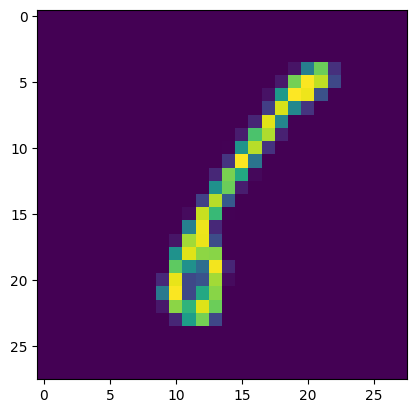

Predict: 1
Original: 6


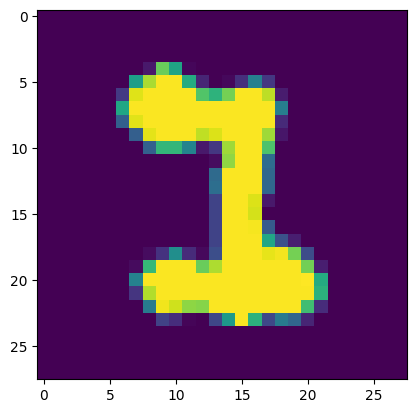

Predict: 7
Original: 1


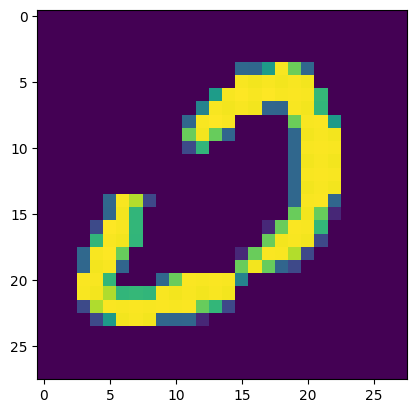

Predict: 2
Original: 0


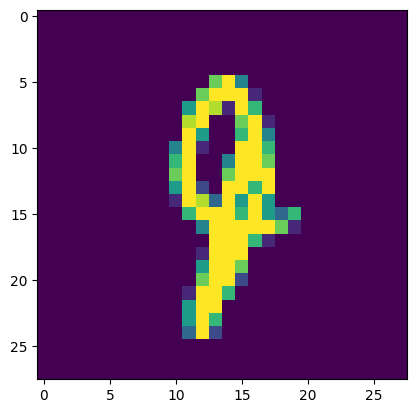

Predict: 4
Original: 9


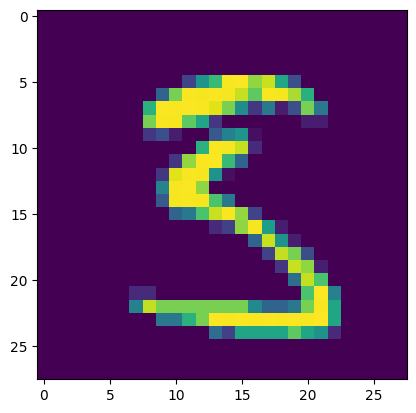

Predict: 3
Original: 5


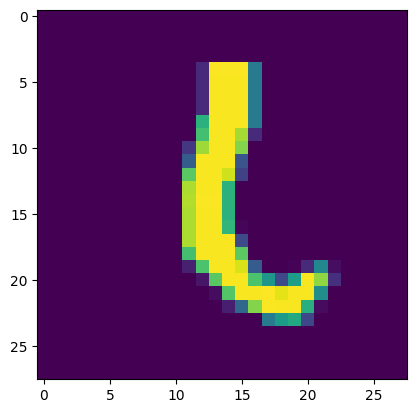

Predict: 1
Original: 6


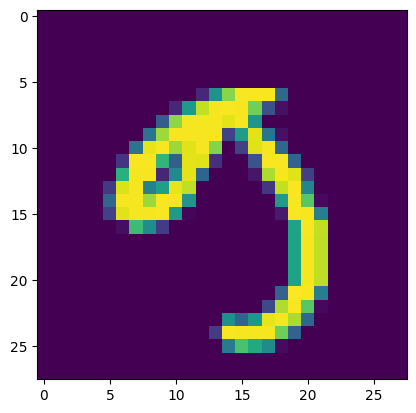

Predict: 5
Original: 9


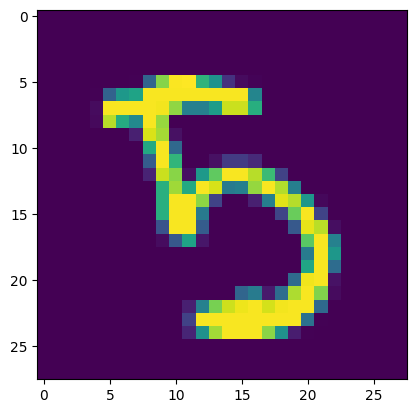

Predict: 3
Original: 5


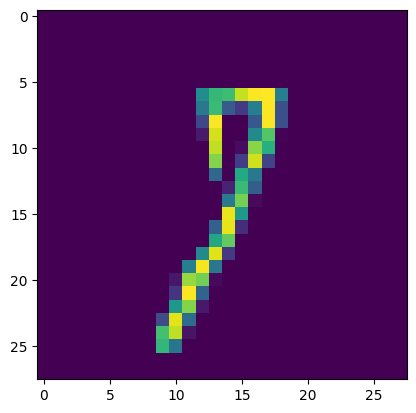

Predict: 9
Original: 7


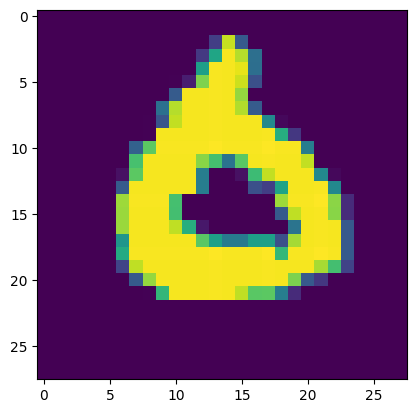

Predict: 0
Original: 6


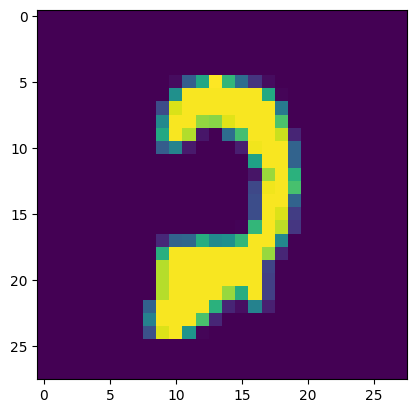

Predict: 7
Original: 2


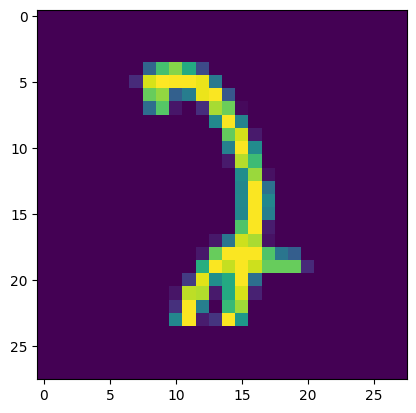

Predict: 7
Original: 2


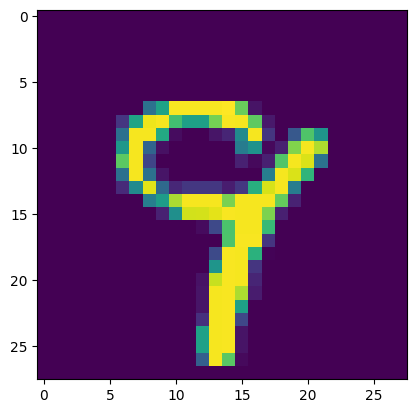

Predict: 7
Original: 9


In [ ]:
for image_number in range(X_test.shape[0]):
    arr = np.array(X_test[image_number])
    arr = arr.reshape(1, 28, 28, 1)

    predicted_label = model.predict(arr, verbose=0).argmax()
    original_label = y_test[image_number]

    if (predicted_label != original_label):
        plt.imshow(X_test[image_number])
        plt.show()

        print(f"Predict: {predicted_label}")
        print(f"Original: {original_label}")